# Subplots and Enumeration - Lab

## Introduction

In this lab, we'll get some practice creating **_subplots_** and explore how we can use the `enumerate` keyword to make creating them a bit easier!

## Objectives

You will be able to:

* Create subplots using a Matplotlib figure
* Use the enumerate function in a for loop to track the index while iterating over a collection

## Getting Started

For this lab, we'll explore a dataset containing yearly population data about different countries and regions around the globe. Let's start by importing the dataset so we can get to work.

In the cell below: 

* Import `pandas` and set the standard alias of `pd` 
* Import the `pyplot` module from `matplotlib` and set the standard alias of `plt` 
* Set matplotlib visualizations to appear inline with the command `%matplotlib inline` 

In [1]:
# Import pandas
# Import matplotlib
# Make sure matplotlib plots appear inline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's import the dataset. 

In the cell below:

* Use `pandas` to read in the data stored in the file `'population.csv'` 
* Print the first five rows of the DataFrame to ensure everything loaded correctly and get a feel for what this dataset contains 

In [2]:
# Import the file
df = pd.read_csv('population.csv')

# Print the first five rows 
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.0
1,Arab World,ARB,1961,95044497.0
2,Arab World,ARB,1962,97682294.0
3,Arab World,ARB,1963,100411076.0
4,Arab World,ARB,1964,103239902.0


Our columns look fairly standard. Let's take a look at the `value_counts()` of the `'Country Name'` column to get a feel for how many years there are per country. 

Do this now in the cell below. 

In [3]:
# Look at the value_counts() of the 'Country Name' column
df['Country Name'].value_counts()

Bolivia                      57
Belize                       57
Norway                       57
Portugal                     57
Small states                 57
                             ..
Kuwait                       54
Eritrea                      52
Serbia                       27
West Bank and Gaza           27
Sint Maarten (Dutch part)    19
Name: Country Name, Length: 263, dtype: int64

## Groupings and Subplots

When creating subplots, it makes sense that we'll usually want the plots to contain data that is related to one another, so that the subplots will make it easy to visually compare and see trends or patterns. The easiest way to do this is to group our data by the types of information we're most interested in seeing. For this dataset, that means that we can group by `'Country Name'`, by `'Country Code'`, or by `'Year'`. Let's start by grouping by name.

For our first subplot, we'll create 1 row containing 2 subplots. Let's start by getting some data for each of our plots. We'll do this by slicing data for the USA and Canada and storing them in separate variables. 

In the cell below:

* Slice all the rows for '`United States`' and store them in the appropriate variable. 
* Slice all the rows for '`Canada`' and store them in the appropriate variable. 
* Inspect the `head()` of each to ensure that we grabbed the data correctly. 

In [7]:
# Slice all the rows for USA
usa = df[df['Country Name']=='United States']

# Slice all the rows for Canada
canada = df[df['Country Name']=='Canada']

# Inspect the head of USA and Canada
[print(f"{subdf.head()}\n") for subdf in [usa, canada]]

        Country Name Country Code  Year        Value
14288  United States          USA  1960  180671000.0
14289  United States          USA  1961  183691000.0
14290  United States          USA  1962  186538000.0
14291  United States          USA  1963  189242000.0
14292  United States          USA  1964  191889000.0

     Country Name Country Code  Year       Value
4617       Canada          CAN  1960  17909009.0
4618       Canada          CAN  1961  18271000.0
4619       Canada          CAN  1962  18614000.0
4620       Canada          CAN  1963  18964000.0
4621       Canada          CAN  1964  19325000.0



[None, None]

Now that our data is ready, lets go ahead and create a basic subplot. For our first batch of subplots, we'll use the quick way by making use of `plt.subplot()` and passing in the number of rows, number of columns, and the number of the subplots that we want to create. Then, we'll create our plot by passing in the corresponding data. 

When we call `plt.subplot()`, it will return an `ax` (short for 'axis') object that corresponds to the third parameter we pass in -- the actual plot we will want to create. To create subplots on the fly with this method, we'll:

1. Get the `ax` object for the first plot in the subplot we want to create. Store this in the variable `ax1` 
2. Call `.plot()` on the `usa` DataFrame, and specify the following parameters:
    * `x='Year'`
    * `y='Value'`
    * `ax=ax1`
3. Use the `ax1` object's methods to do any labeling we find necessary 
4. Repeat the process for `canada` with the second plot. Store this axis in `ax2`   

Do this now in the cell below. 

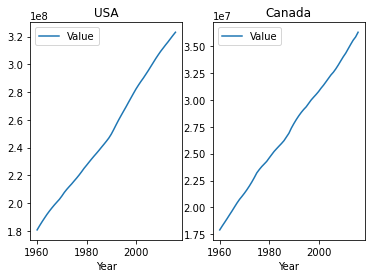

In [11]:
# Subplot for USA
ax1 = plt.subplot(1,2,1)
usa.plot(x='Year', y='Value', ax=ax1)
ax1.set_title('USA')

# Subplot for Canada
ax2 = plt.subplot(1,2,2)
canada.plot(x='Year', y='Value', ax=ax2)
ax2.set_title('Canada');


Our plots look pretty good, but they're a bit squished together, and the plots themselves are much too small, which squishes the axis values.  Both of these problems have an easy fix. We'll begin by using `plt.figure()` and passing in a larger `figsize` of `(20, 10)` to tell matplotlib we want the full subplot to be 20 inches by 10.  

We can fix the spacing quite easily by using `plt.subplots_adjust()` and changing the amount of space in between our plots. The [documentation for `subplots_adjust`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) tells us that the parameter we need to adjust is `wspace`. This is set to `0.2` by default, meaning that the amount of space between our plots is equal to 20% of the width of the plots. Let's set `wspace=0.4`, and see how that looks.

In the cell below: 

* Call `plt.figure()` and use the `figsize` parameter to set the size of the total subplot to 20 inches wide by 10 inches tall. Remember to pass these values in as a tuple, with width first and height second  
* Copy the visualization code from the cell above into the cell below  
* After setting the title for the Canada plot, add the line `plt.subplots_adjust()` and pass in the parameter `wspace=0.4` 

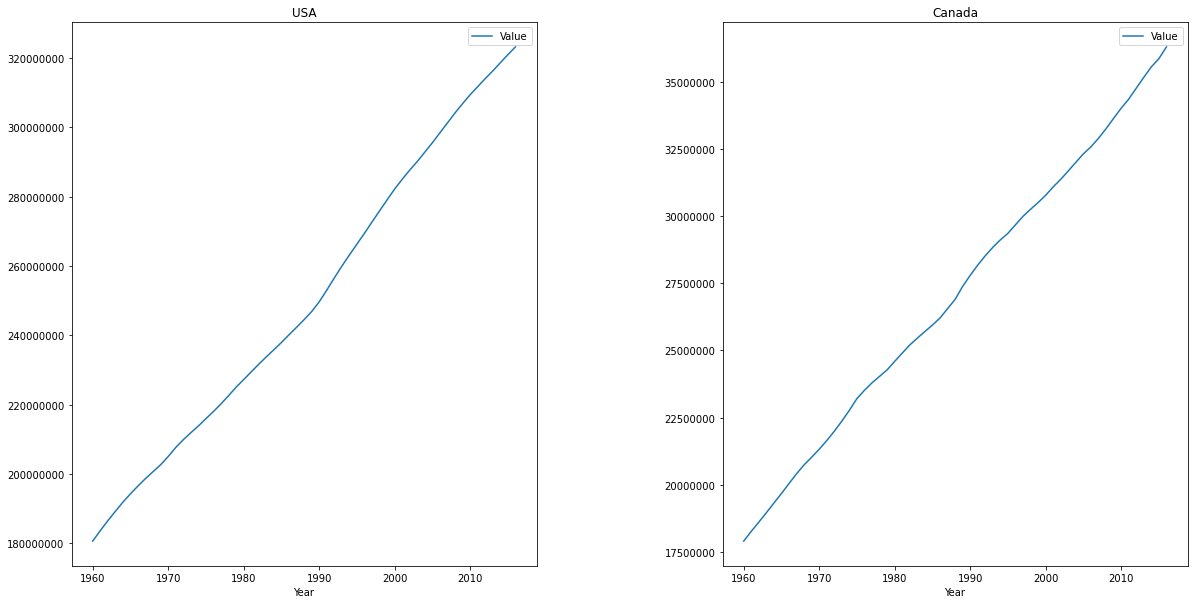

In [15]:
# Create figure
plt.figure(figsize=(20,10))

# Subplot for USA
ax1 = plt.subplot(1,2,1)
usa.plot(x='Year', y='Value', ax=ax1)
ax1.set_title('USA')

# Subplot for Canada
ax2 = plt.subplot(1,2,2)
canada.plot(x='Year', y='Value', ax=ax2)
ax2.set_title('Canada')

plt.subplots_adjust(wspace=0.4)
[ax.ticklabel_format(axis='y', style='plain') for ax in [ax1, ax2]];

Much better!

Next, we'll see some advanced methods for creating subplots. But, before we do that, let's take a brief detour and learn about the `enumerate` keyword!

## Using `enumerate()`

Python's `enumerate()` keyword is a special type of `for` loop. It works just like a regular `for` loop, with one major difference -- instead of just returning the next object with each iteration of the loop, it also returns the index of the object from the collection we're looping through! 

Run the example code in the cell below, and examine the output. That should make it clear what is happening. 

In [16]:
sample_list = ['foo', 'bar', 'baz']

for index, value in enumerate(sample_list):
    print("Index: {}      Value: {}".format(index, value))    

Index: 0      Value: foo
Index: 1      Value: bar
Index: 2      Value: baz


The `enumerate` keyword is extremely helpful anytime we need to do something that needs the index of the item we're looping through. Let's try an example: 

In the cell below: 
* `enumerate()` through `sample_list_2` 
* For any item in `sample_list_2`, append it to the `odds` list if it's index is an odd number 
* Once the loop has finished, print `odds` 

In [21]:
sample_list_2 = ['item at Index ' + str(i) for i in range(10)]
odds = []

# Write your code below this line
for i, v in enumerate(sample_list_2):
    if i%2: odds.append(v)


# Write your code above this line

odds
# Expected Output: 
# ['item at Index 1',
#  'item at Index 3',
#  'item at Index 5',
#  'item at Index 7',
#  'item at Index 9']

['item at Index 1',
 'item at Index 3',
 'item at Index 5',
 'item at Index 7',
 'item at Index 9']

Great! There are plenty of situations where `enumerate()` comes in very handy. By allowing us to get the index and the value at the same time, it makes it simple to manipulate one variable based on the value of the other. This is a natural requirement of subplots.

## Enumerating with Subplots

To end this lab, we'll see how we can use `enumerate` to easily subplot this entire DataFrame by country -- all 263 of them!

It will work like this. We'll begin by grouping each row in our DataFrame by `'Country Name'`. Then, we'll create a `plt.figure()` and set the figure size to `(20,40)`. We'll also set the `facecolor` to `'white'`, so that it's a bit easier to read. 

Then comes the fun part. We'll enumerate through our grouped DataFrame. Just looping through a grouped DataFrame returns a tuple containing the index and the rows with that country name. Since we're grouped by `'Country Name'`, this means that the index will actually be the `'Country Name'`. However, we're not just looping through the grouped DataFrame -- we're `enumerate`-ing through it! 

```python
for index, (value1, value2) in enumerate(grouped_DataFrame):
    # index is an integer, starting at 0 and counting up by 1 just 
    # like we would expect a for loop to do
    
    #(value1, value2) is a tuple containing the name of the country as value 1
    # (since it is acting as the index because we grouped everything by it),
    # and value 2 is all the rows that belong to that country's group. 
    
```

This means that the `index` for our enumeration will be an integer value that counts higher by 1 with each country. If we just add 1 to it (because subplots start counting at 1, but Python starts counting at 0), then this number will correspond with the index we need to pass in as the third parameter in `plt.subplot()` -- the parameter that specifies which plot inside the subplot should show the plot we're about to create. 

Don't worry if this seems confusing -- the code below has been commented to help you. 

In [27]:
grouped_df = df.groupby('Country Name')

grouped_df.head()

grouped_df.indices

{'Afghanistan': array([2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632,
        2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643,
        2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654,
        2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665,
        2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676,
        2677, 2678]),
 'Albania': array([2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689,
        2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700,
        2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711,
        2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722,
        2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733,
        2734, 2735]),
 'Algeria': array([2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746,
        2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757,
        2758, 2759, 2760, 2761,

AttributeError: 'function' object has no attribute 'tight_layout'

/Users/jessicamiles/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


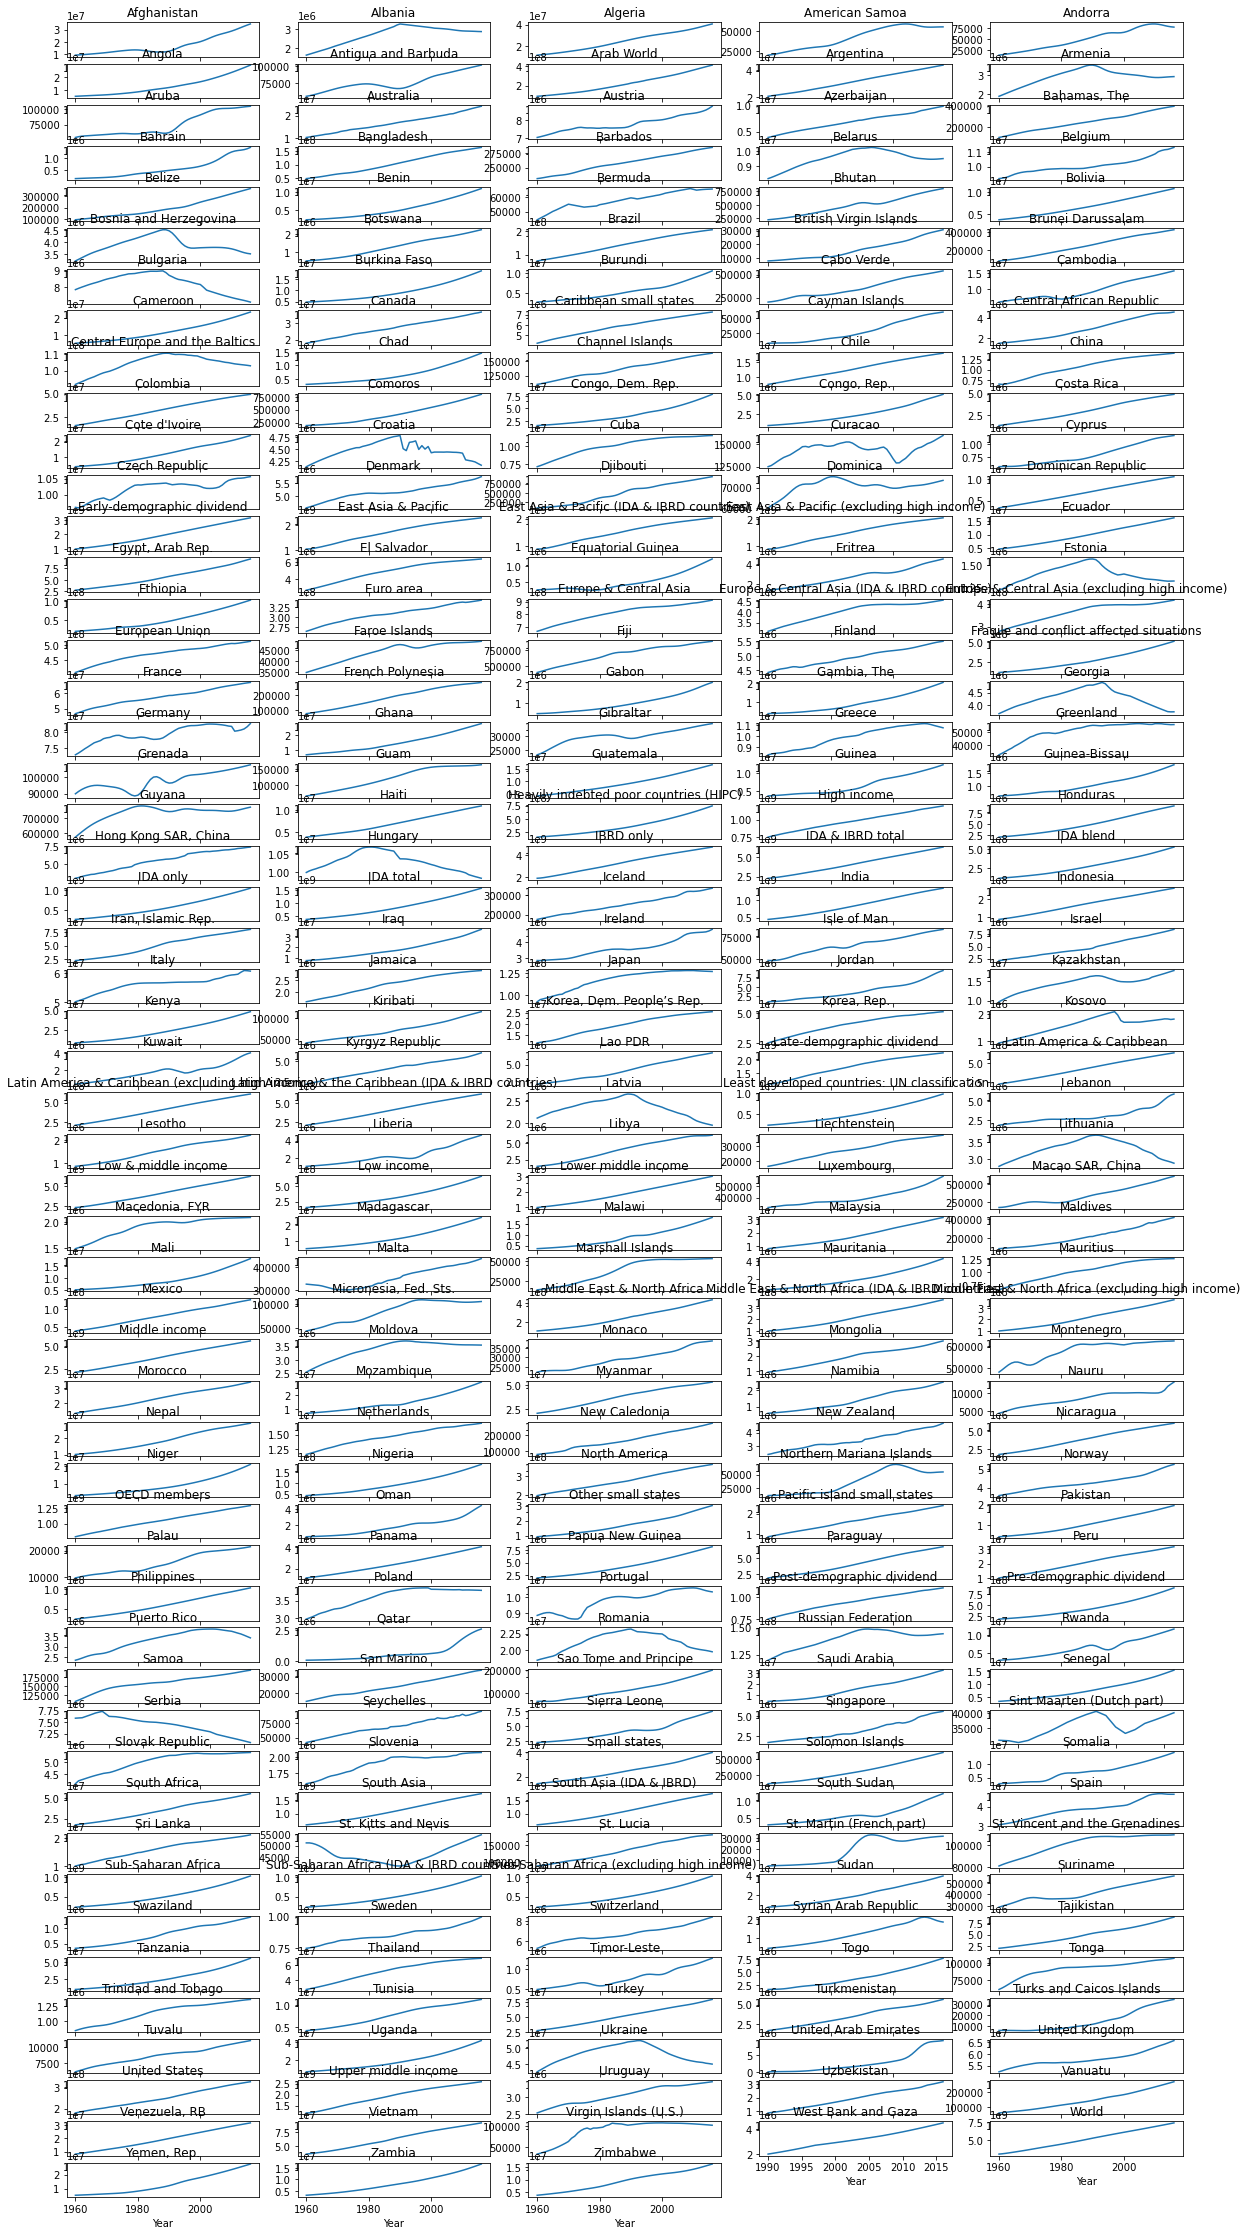

In [42]:

# pass in figsize=(20,40) and also set the facecolor parameter to 'white'
plt.figure(figsize=(20,40), facecolor='white')

# Complete the line below so that the first loop variable is the called index,
# and the second loop variable is the tuple (countryname, population)  
for index, (country, population) in enumerate(grouped_df):
    
    # Get the unique subplot where the plot we're creating during this iteration
    # of the loop will live. Our subplot will be 30 rows of 9 plots each  
    # Set the third value to be index+1
    ax = plt.subplot(53, 5, index+1)
    
    # Complete the line to create the plot for this subplot  
    # Same visualizations as we created above!
    population.plot(x='Year', y='Value', ax=ax, legend=False)
    
    # Set the title of each plot, so we know which country it represents
    ax.set_title(country)

#plt.subplots_adjust(wspace=0.4,hspace=1.5)
plt.figure.tight_layout(pad=3.0)

Great job! Being able to effectively create subplots with `matplotlib` is a solid data visualization skill to have -- and using `enumerate()` makes our code that much simpler!

## Summary

In this lab, we learned how to create advanced subplots using `enumerate()` on grouped DataFrames!